# Value Function Iteration: An Example

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Step 1: Set Parameters

In [30]:
# Model Parameters
alpha = 0.36
beta = 0.96
delta = 0.1
A = 1

# Algorithm Parameters
nk = 1000
tol = 1e-6
error = 1
iter = 1

## Step 2: Discretize State Space

In [31]:
# Discretize state space
kss = (1/(A*alpha*beta) - (1 - delta)/(A*alpha)) ** (1/(alpha - 1))
kmin = 0.01
kmax = 10
kgrid = np.linspace(kmin, kmax, nk)


## Step 3: Compute Every Potential Consumption/Utility

In [32]:
c = np.zeros((nk, nk))
utility = np.zeros((nk,nk))
for i in range(nk):
    k_now = kgrid[i]
    for j in range(nk):
        k_next = kgrid[j]
        c[i,j] = A * (k_now ** alpha) + (1 - delta) * k_now - k_next
        if c[i,j] <=0:
            utility[i,j] = -99999
        else:
            utility[i,j] = np.log(c[i,j])

## Step 4: Value Function Iteration

Converged at 289 iterations!


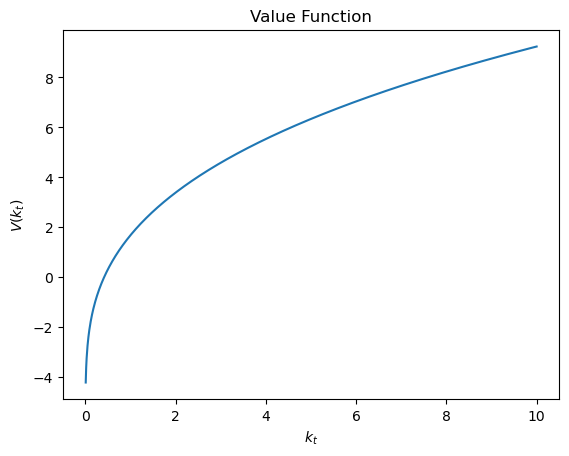

In [33]:
v0 = np.zeros((nk))
v1 = np.zeros((nk))
dr = np.zeros(nk, dtype="int")

# value function iteration
while error > tol:
    for i in range(nk):
        rhs = utility[i,:] + beta * v0
        v1[i] = np.max(rhs)
        dr[i] = np.argmax(rhs)
    error = np.max(np.abs(v1-v0))
    v0 = np.copy(v1)
    iter = iter + 1

print(f"Converged at {iter} iterations!")
v = np.copy(v1)

plt.plot(kgrid, v)
plt.xlabel('$k_t$')
plt.ylabel('$V(k_t)$')
plt.title('Value Function')
plt.show()

## Step 5: Compute Policy Functions

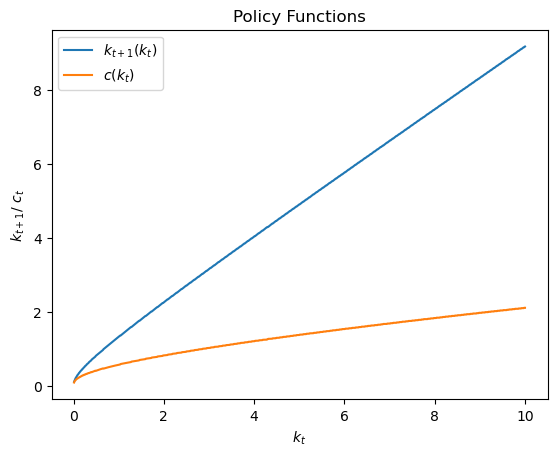

In [34]:
kp = kgrid[dr]
cp = A * (kgrid ** alpha) + (1 - delta) * kgrid - kp

plt.plot(kgrid, kp, label='$k_{t+1}(k_t)$')
plt.plot(kgrid, cp, label='$c(k_t)$')
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$/ $c_t$')
plt.legend()
plt.title('Policy Functions')
plt.show()

## Step 6: Simulate The Model

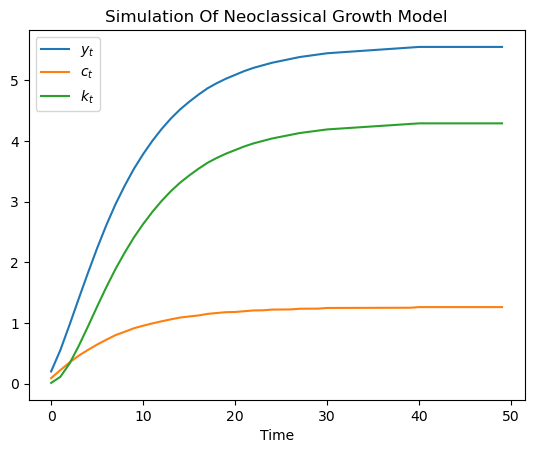

In [35]:
k0 = kgrid[0]
T = 50
kt = np.zeros(T+1)
kt[0] = k0
ct = np.zeros(T)
yt = np.zeros(T)

kp_interp = interp1d(kgrid, kp, kind='linear')
cp_interp = interp1d(kgrid, cp, kind='linear')

for i in range(T):
    kt[i+1] = kp_interp(kt[i])
    ct[i] = cp_interp(kt[i])
    yt[i] = A * (kt[i] ** alpha) + (1 - delta) * kt[i]

plt.plot(range(T), yt, label='$y_t$')
plt.plot(range(T), ct, label='$c_t$')
plt.plot(range(T), kt[:T], label='$k_t$')
plt.xlabel('Time')
plt.legend()
plt.title('Simulation Of Neoclassical Growth Model')
plt.show()